<a href="https://colab.research.google.com/github/Tianming-Zhu/BrainMRI/blob/main/Training_Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import math
import nibabel as nib
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import glob
import os
#from torch.nn import BatchNorm3d, Conv3d, ConvTranspose3d, LeakyReLU, Module, ReLU, Sequential, Sigmoid, Flatten, init,Dropout, functional,Linear,Tanh,L1Loss
#from torch.nn.functional import cross_entropy
# from torch.nn import functional
import time
from sklearn.model_selection import train_test_split
#from torch.optim import Adam
# from torch.utils.data import DataLoader, TensorDataset
#from torchsummary import summary

In [2]:
#! git clone https://github.com/Tianming-Zhu/BrainMRI

Cloning into 'BrainMRI'...
remote: Enumerating objects: 173, done.
remote: Counting objects: 100% (173/173), done.
remote: Compressing objects: 100% (170/170), done.
remote: Total 173 (delta 16), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (173/173), 302.94 MiB | 13.99 MiB/s, done.
Resolving deltas: 100% (16/16), done.
Checking out files: 100% (118/118), done.


In [2]:
import sys
sys.path.append("/content/BrainMRI")

In [3]:
from Code import Autoencoder

In [4]:
filelist = glob.glob('/content/BrainMRI/Public Dataset/sub*')

In [5]:
len(filelist) #number of images

113

In [6]:
images = []
for i in np.arange(len(filelist[0:15])):
    img = nib.load(filelist[i])
    images.append(img.get_fdata())

In [7]:
data = torch.from_numpy(np.array(images)).float()

In [8]:
data.shape

torch.Size([15, 190, 190, 190])

In [8]:
## split data into training/validation/test
train_val_data, testdata = train_test_split(data, test_size=0.15, random_state=42)

In [9]:
train_val_data.shape

torch.Size([12, 190, 190, 190])

In [10]:
AE = Autoencoder.AutoEncoder()
if torch.cuda.device_count() > 1:
  print("Let's use", torch.cuda.device_count(), "GPUs!")
  AE = nn.DataParallel(AE)
start_time = time.time()
AE.fit(train_val_data, validation=True,model_summary=False)
elapsed_time = time.time() - start_time

data dimension: torch.Size([12, 190, 190, 190])
side is: 190
depth is: 190
Training sample size: torch.Size([10, 190, 190, 190])
Validation sample size: torch.Size([2, 190, 190, 190])
FID loss is: tensor(437.6160, dtype=torch.float64)
Epoch 1, Training Loss: 437.6159779583299


/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_schur.py:286: RuntimeWarning: divide by zero encountered in cfloat_scalars
  c = mu[0] / r
/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_schur.py:287: RuntimeWarning: divide by zero encountered in cfloat_scalars
  s = T[m, m-1] / r
/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_schur.py:287: RuntimeWarning: invalid value encountered in cfloat_scalars
  s = T[m, m-1] / r
/usr/local/lib/python3.7/dist-packages/scipy/linalg/_matfuncs_sqrtm.py:88: RuntimeWarning: invalid value encountered in cdouble_scalars
  R[i, j] = (T[i, j] - s) / denom


Epoch 1, Validation Loss: nan
FID loss is: tensor(442.6037, dtype=torch.float64)
Epoch 2, Training Loss: 442.6037281954849
Epoch 2, Validation Loss: 302.270895503668
FID loss is: tensor(444.1951, dtype=torch.float64)
Epoch 3, Training Loss: 444.1951133927447
Epoch 3, Validation Loss: 302.96511116764526
FID loss is: tensor(445.5742, dtype=torch.float64)
Epoch 4, Training Loss: 445.5741857138227
Epoch 4, Validation Loss: 303.6592923573667
FID loss is: tensor(450.6056, dtype=torch.float64)
Epoch 5, Training Loss: 450.6056352834689
Epoch 5, Validation Loss: 304.1503959203842
FID loss is: tensor(440.0933, dtype=torch.float64)
Epoch 6, Training Loss: 440.0933152600352
Epoch 6, Validation Loss: 304.6612888450645
FID loss is: tensor(440.5022, dtype=torch.float64)
Epoch 7, Training Loss: 440.5021712055763
Epoch 7, Validation Loss: 305.2198842277215
FID loss is: tensor(451.6994, dtype=torch.float64)
Epoch 8, Training Loss: 451.69944228541226
Epoch 8, Validation Loss: 305.9474188739343
FID loss i

KeyboardInterrupt: ignored

In [ ]:
elapsed_time

164.99108147621155

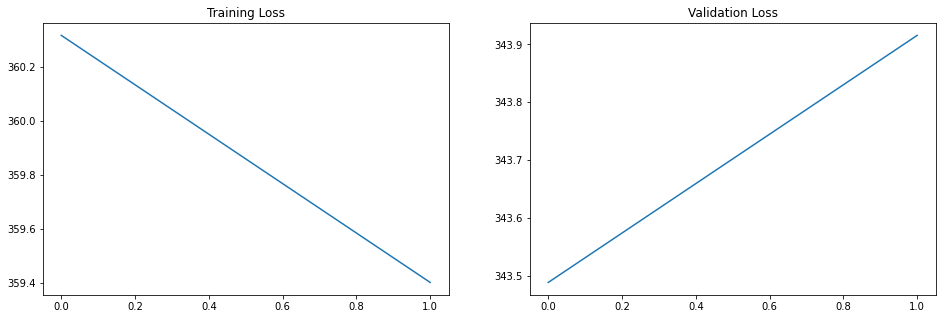

In [ ]:
fig,ax = plt.subplots(1, 2, figsize=(16, 5))
ax[0].set_title('Training Loss')
ax[0].plot(AE.train_loss_vec)
ax[1].set_title('Validation Loss')
ax[1].plot(AE.val_loss_vec);

In [ ]:
AE.encoder

Encoder(
  (seq): Sequential(
    (0): Conv3d(1, 2, kernel_size=(4, 4, 4), stride=(2, 2, 2), bias=False)
    (1): BatchNorm3d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv3d(2, 4, kernel_size=(4, 4, 4), stride=(2, 2, 2), bias=False)
    (4): BatchNorm3d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv3d(4, 8, kernel_size=(4, 4, 4), stride=(2, 2, 2), bias=False)
    (7): BatchNorm3d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): Conv3d(8, 16, kernel_size=(4, 4, 4), stride=(2, 2, 2), bias=False)
    (10): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
  )
)

In [ ]:
AE.decoder

Decoder(
  (seq): Sequential(
    (0): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): ReLU(inplace=True)
    (2): ConvTranspose3d(16, 8, kernel_size=(4, 4, 4), stride=(2, 2, 2), bias=False)
    (3): BatchNorm3d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU(inplace=True)
    (5): ConvTranspose3d(8, 4, kernel_size=(4, 4, 4), stride=(2, 2, 2), bias=False)
    (6): BatchNorm3d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU(inplace=True)
    (8): ConvTranspose3d(4, 2, kernel_size=(4, 4, 4), stride=(2, 2, 2), bias=False)
    (9): BatchNorm3d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): ConvTranspose3d(2, 1, kernel_size=(4, 4, 4), stride=(2, 2, 2), bias=False)
    (12): ReLU(inplace=True)
  )
)

In [ ]:
AE.bn

Bottleneck(
  (seq): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Dropout(p=0.5, inplace=False)
    (2): Linear(in_features=16000, out_features=128, bias=True)
    (3): Linear(in_features=128, out_features=16000, bias=True)
    (4): Dropout(p=0.5, inplace=False)
  )
)

In [ ]:
AE.save("model1.pkl")

In [ ]:
#model = torch.load('model1.pkl', map_location=torch.device('cpu'))

In [ ]:
output = AE.reconstruct(data)

In [ ]:
output.max()

tensor(0.0010, grad_fn=<MaxBackward1>)

In [ ]:
output.min()

tensor(0., grad_fn=<MinBackward1>)

In [ ]:
output[0].shape

torch.Size([190, 190, 190])

In [ ]:
output[0]

tensor([[[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.7729e-04,
          0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 2.0412e-07,  ..., 1.8032e-04,
          0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 2.4627e-05,  ..., 0.0000e+00,
          6.9125e-05, 7.7779e-05],
         ...,
         [6.6813e-07, 6.8039e-05, 0.0000e+00,  ..., 1.2811e-04,
          1.4232e-05, 2.1388e-05],
         [8.0613e-05, 6.4972e-06, 8.8200e-05,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [0.0000e+00, 8.3881e-05, 2.9438e-05,  ..., 4.2491e-05,
          0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.2948e-04,
          0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 4.8602e-06,  ..., 1.5652e-04,
          0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.6855e-04,
          4.3633e-05, 5.6801e-05],
         ...,
         [1.5909e-05, 0.0000e+00, 0.0000e+00,  ..., 8.3404e-05,
          0.000

In [ ]:
## continue train the model
model = torch.load('model1.pkl', map_location=torch.device('cpu'))

In [ ]:
start_time = time.time()
model.fit(train_val_data, validation=True,model_summary=False,reload=True)
elapsed_time = time.time() - start_time

data dimension: torch.Size([17, 190, 190, 190])
side is: 190
depth is: 190
Training sample size: torch.Size([14, 190, 190, 190])
Validation sample size: torch.Size([3, 190, 190, 190])
Epoch 0
Epoch 1, Training Loss: 360.8488498727688
Epoch 1, Validation Loss: 344.3640576002724
Epoch 1
Epoch 2, Training Loss: 363.9651745105915
Epoch 2, Validation Loss: 344.84173150106574


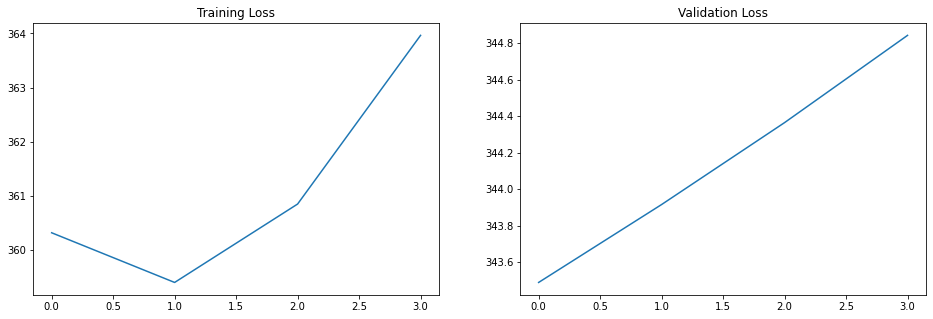

In [ ]:
fig,ax = plt.subplots(1, 2, figsize=(16, 5))
ax[0].set_title('Training Loss')
ax[0].plot(model.train_loss_vec)
ax[1].set_title('Validation Loss')
ax[1].plot(model.val_loss_vec);

In [ ]:
output = model.reconstruct(data)

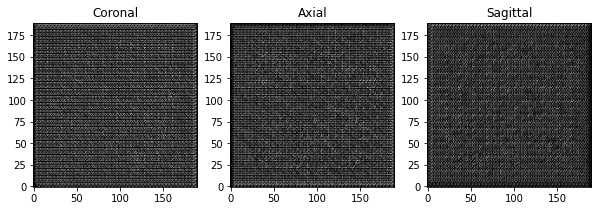

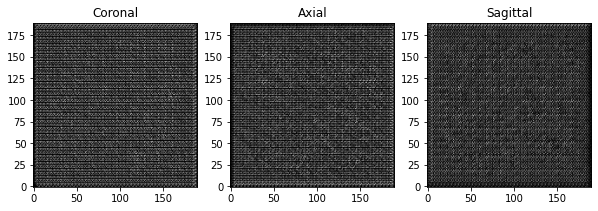

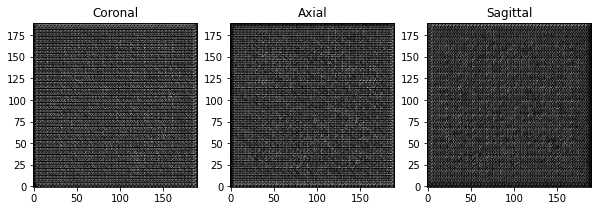

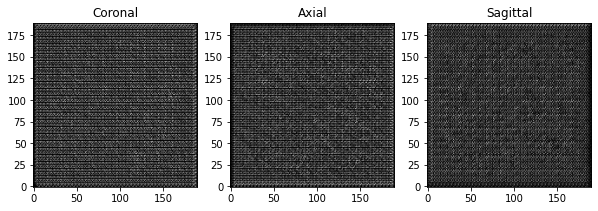

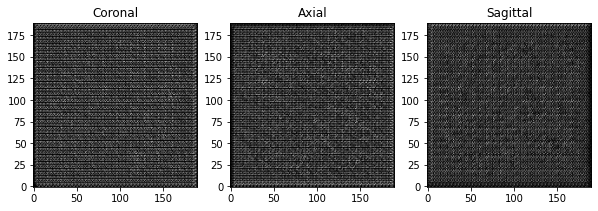

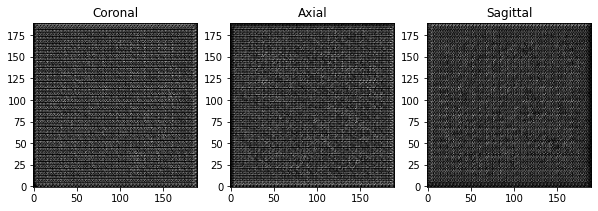

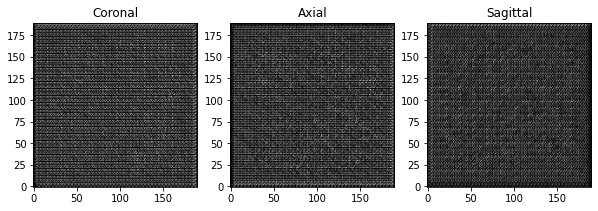

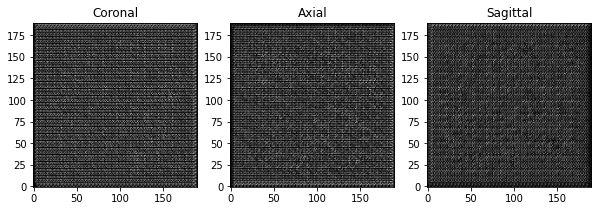

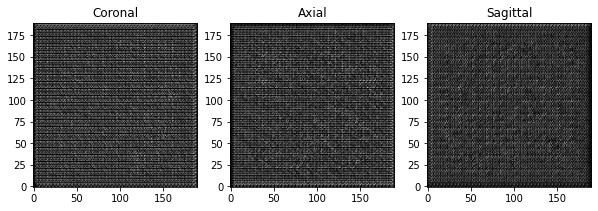

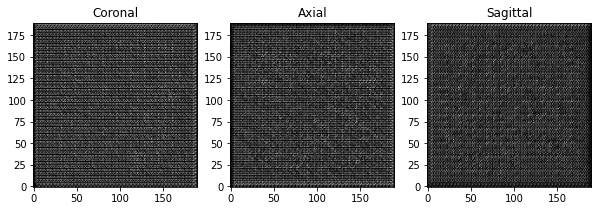

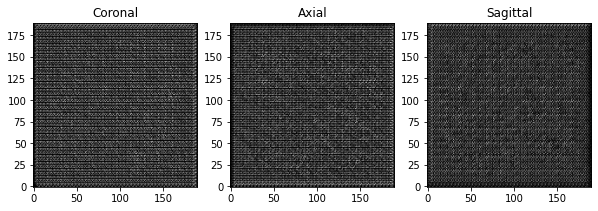

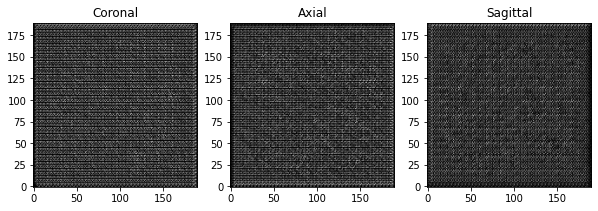

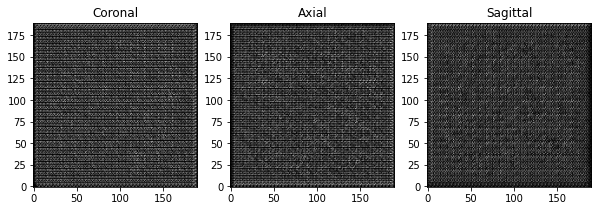

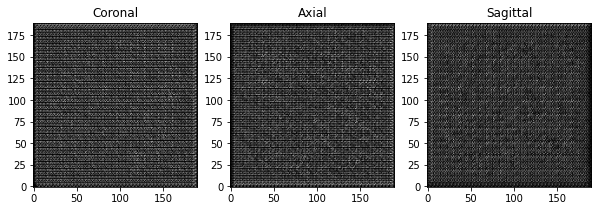

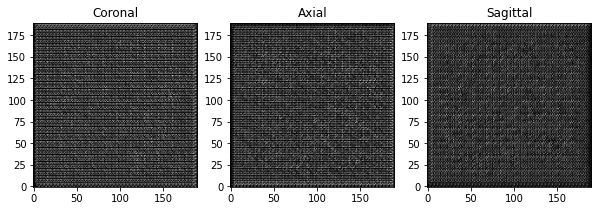

In [ ]:
## Plot of original skull stripped image
for i in np.arange(15):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,12))
    img = output[i].detach().numpy()
    axes[0].imshow(img[120,:,:],cmap='gray',origin='lower') #Coronal
    axes[1].imshow(img[:,100,:],cmap='gray',origin='lower') #Axial
    axes[2].imshow(img[:,:,100].T,cmap='gray',origin='lower') #Sagittal (Note that it requires transpose to be shown upright)
    axes[0].set_title("Coronal")
    axes[1].set_title("Axial")
    axes[2].set_title("Sagittal")
    plt.show();

In [ ]:
model.save("model2.pkl")